In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
from sklearn.preprocessing import MinMaxScaler,LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import log_loss,accuracy_score,classification_report,confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [2]:
data = pd.read_csv("churn_modelling.csv")
data

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [3]:
data.shape

(10000, 14)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [5]:
data.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [6]:
data['Exited'].value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

In [7]:
data['Geography'].value_counts()

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

In [8]:
data['Gender'].value_counts()

Gender
Male      5457
Female    4543
Name: count, dtype: int64

In [9]:
data.duplicated().sum()

0

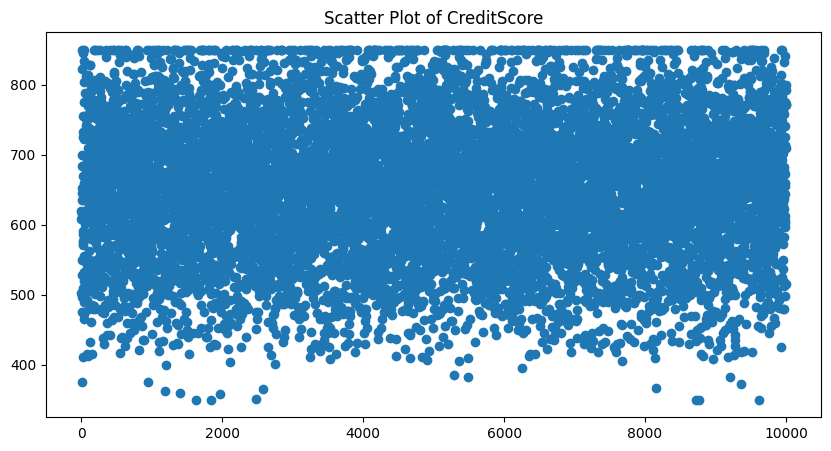

In [10]:
plt.figure(figsize=(10, 5))  
plt.scatter(range(len(data['CreditScore'])), data['CreditScore'])

plt.title('Scatter Plot of CreditScore')

plt.show()

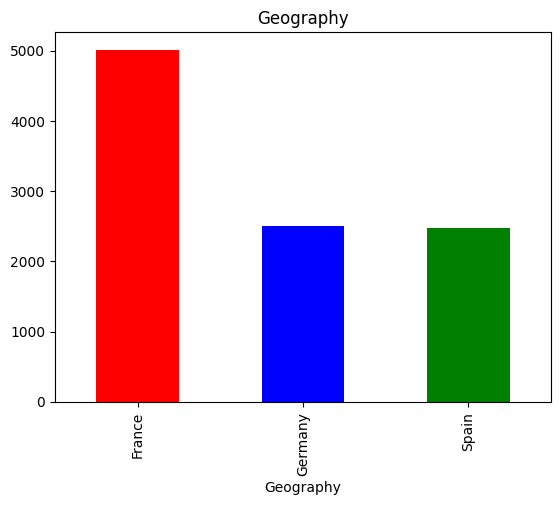

In [11]:
data['Geography'].value_counts().plot(kind='bar',color=['r','b','g'])

plt.title('Geography')
plt.show()

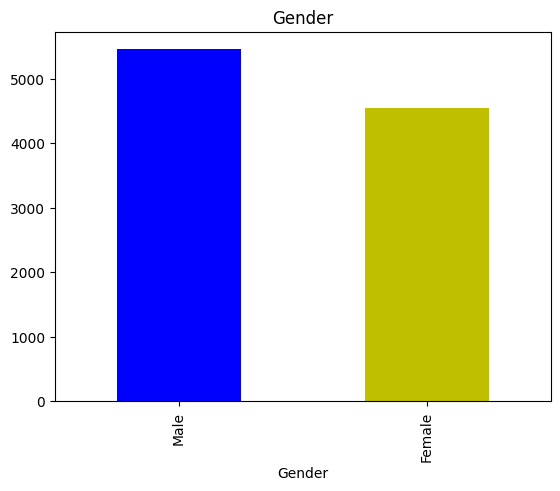

In [12]:
data['Gender'].value_counts().plot(kind='bar',color=['b','y'])
plt.title('Gender')
plt.show()

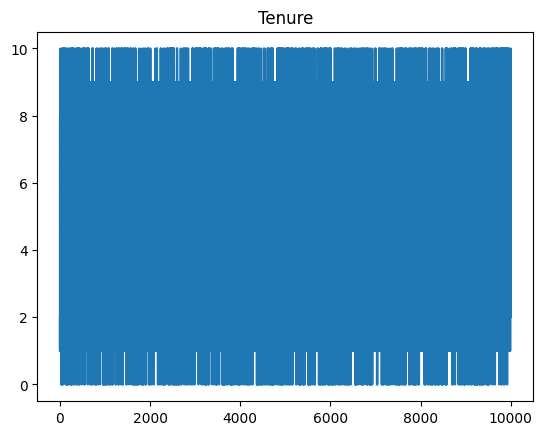

In [13]:
plt.plot(data['Tenure'])
plt.title('Tenure')
plt.show()

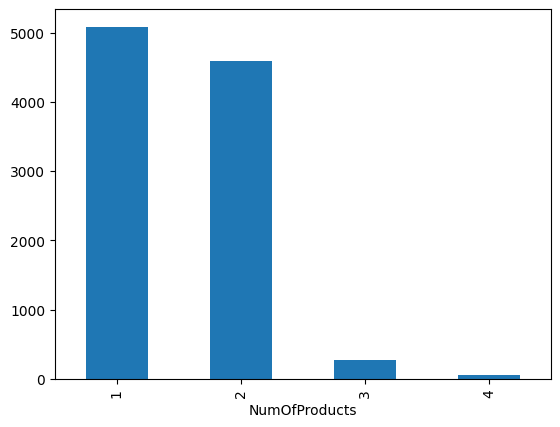

In [14]:
data['NumOfProducts'].value_counts().plot(kind='bar')

plt.show()

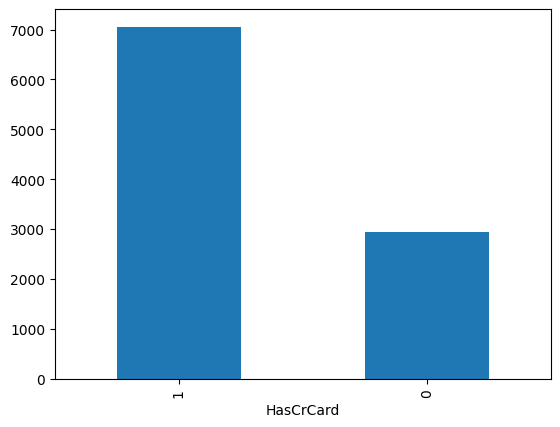

In [15]:
data['HasCrCard'].value_counts().plot(kind='bar')

plt.show()

In [16]:
data.drop(columns=["RowNumber","CustomerId","Surname"],inplace=True)
data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [17]:
encode_Geography = {'France' :0,
                 'Spain':1,
                 'Germany':2
                   }

In [18]:
data['Geography'] = data['Geography'].str.strip().map(encode_Geography )

In [19]:
data

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,Female,42,2,0.00,1,1,1,101348.88,1
1,608,1,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,0,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,0,Female,39,1,0.00,2,0,0,93826.63,0
4,850,1,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,0,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,0,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,0,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,2,Male,42,3,75075.31,2,1,0,92888.52,1


In [20]:
encode_Gender = {'Male' :1,
                 'Female':0
                   }

In [21]:
data['Gender'] = data['Gender'].str.strip().map(encode_Gender )

In [22]:
data

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,608,1,0,41,1,83807.86,1,0,1,112542.58,0
2,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,850,1,0,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,0,1,39,5,0.00,2,1,0,96270.64,0
9996,516,0,1,35,10,57369.61,1,1,1,101699.77,0
9997,709,0,0,36,7,0.00,1,0,1,42085.58,1
9998,772,2,1,42,3,75075.31,2,1,0,92888.52,1


In [23]:
y = data['Exited']

In [24]:
data.drop(columns=["Exited"],inplace=True)

In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  int64  
 2   Gender           10000 non-null  int64  
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
dtypes: float64(2), int64(8)
memory usage: 781.4 KB


In [26]:
x_train,x_test,y_train,y_test=train_test_split(data,y,test_size=0.20,random_state=42)

In [27]:
sc = StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

In [28]:
# minmax=MinMaxScaler()
# x_scale=minmax.fit_transform(x)

In [29]:
x_train

array([[ 0.35649971, -0.90598864,  0.91324755, ...,  0.64920267,
         0.97481699,  1.36766974],
       [-0.20389777,  1.50315516,  0.91324755, ...,  0.64920267,
         0.97481699,  1.6612541 ],
       [-0.96147213,  0.29858326,  0.91324755, ...,  0.64920267,
        -1.02583358, -0.25280688],
       ...,
       [ 0.86500853, -0.90598864, -1.09499335, ..., -1.54035103,
        -1.02583358, -0.1427649 ],
       [ 0.15932282, -0.90598864,  0.91324755, ...,  0.64920267,
        -1.02583358, -0.05082558],
       [ 0.47065475,  1.50315516,  0.91324755, ...,  0.64920267,
         0.97481699, -0.81456811]])

In [30]:
x_train.shape

(8000, 10)

In [31]:
x_test.shape

(2000, 10)

In [32]:
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, BaggingClassifier, ExtraTreesClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier

# Define classifiers with parameters optimized for small datasets
svc = SVC(kernel='sigmoid', gamma=1.0, C=1.0)
knc = KNeighborsClassifier(n_neighbors=3)
mnb = MultinomialNB(alpha=1.0)
dtc = DecisionTreeClassifier(max_depth=5, min_samples_split=2)
lrc = LogisticRegression(solver='liblinear', penalty='l1', C=1.0)
rfc = RandomForestClassifier(n_estimators=50, max_depth=10, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, learning_rate=1.0, random_state=2)
bc = BaggingClassifier(n_estimators=10, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, max_depth=10, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50, learning_rate=0.1, max_depth=3, random_state=2)
xgb = XGBClassifier(n_estimators=50, learning_rate=0.1, max_depth=3, random_state=2)



In [33]:

clfs = {
    'SVC' : svc,
    'KN' : knc, 
#     'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}



In [34]:
def train_classifier(clf,x_train,y_train,x_test,y_test):
    clf.fit(x_train,y_train)
    y_pred = clf.predict(x_test)
    accuracy = accuracy_score(y_test,y_pred)
    loss = log_loss(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    recall = recall_score(y_test,y_pred)
    f1 = f1_score(y_test,y_pred)
    
    return accuracy,loss,precision,recall,f1

In [35]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score,log_loss
train_classifier(svc,x_train,y_train,x_test,y_test)

(0.6955,
 10.975292456986171,
 0.24407582938388625,
 0.26208651399491095,
 0.252760736196319)

In [36]:
accuracy_scores = []
precision_scores = []
loss_score = []
recall__score = []
f1__score = []

for name,clf in clfs.items():
    
    current_accuracy,current_loss,current_precision,current_recall,current_f1 = train_classifier(clf, x_train,y_train,x_test,y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Loss -",current_loss)
    print("Precision - ",current_precision)
    print("Recall - ",current_recall)
    print("f1 - ",current_f1)
    
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)
    loss_score.append(current_loss)
    recall__score.append(current_recall)
    f1__score.append(current_f1)

For  SVC
Accuracy -  0.6955
Loss - 10.975292456986171
Precision -  0.24407582938388625
Recall -  0.26208651399491095
f1 -  0.252760736196319
For  KN
Accuracy -  0.835
Loss - 5.94720280920433
Precision -  0.6105263157894737
Recall -  0.44274809160305345
f1 -  0.5132743362831859
For  DT
Accuracy -  0.858
Loss - 5.118198781254636
Precision -  0.7684729064039408
Recall -  0.3969465648854962
f1 -  0.5234899328859061
For  LR
Accuracy -  0.814
Loss - 6.704119530375791
Precision -  0.5704697986577181
Recall -  0.21628498727735368
f1 -  0.3136531365313653
For  RF
Accuracy -  0.862
Loss - 4.974024167698167
Precision -  0.7407407407407407
Recall -  0.4580152671755725
f1 -  0.5660377358490566
For  AdaBoost
Accuracy -  0.8575
Loss - 5.136220607949193
Precision -  0.6956521739130435
Recall -  0.48854961832061067
f1 -  0.5739910313901345
For  BgC
Accuracy -  0.854
Loss - 5.262373394811104
Precision -  0.6891385767790262
Recall -  0.4681933842239186
f1 -  0.5575757575757575
For  ETC
Accuracy -  0.857


In [37]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores,'Loss':loss_score,'Recall':recall__score,'f1':f1__score}).sort_values('Accuracy',ascending=False)

In [38]:
performance_df

,Algorithm,Accuracy,Precision,Loss,Recall,f1
8,GBDT,0.8625,0.758772,4.956002,0.440204,0.557166
9,xgb,0.8625,0.778302,4.956002,0.419847,0.545455
4,RF,0.8620,0.740741,4.974024,0.458015,0.566038
2,DT,0.8580,0.768473,5.118199,0.396947,0.523490
5,AdaBoost,0.8575,0.695652,5.136221,0.488550,0.573991
7,ETC,0.8570,0.840764,5.154242,0.335878,0.480000
6,BgC,0.8540,0.689139,5.262373,0.468193,0.557576
1,KN,0.8350,0.610526,5.947203,0.442748,0.513274
3,LR,0.8140,0.570470,6.704120,0.216285,0.313653
0,SVC,0.6955,0.244076,10.975292,0.262087,0.252761


# Logistic Regression`

In [39]:
logistic=LogisticRegression()
logistic.fit(x_train,y_train)

LogisticRegression()

In [40]:
pred=logistic.predict(x_test)

In [41]:
accuracy_score(y_test,pred)

0.8145

In [42]:
confusion_matrix(y_test,pred)

array([[1544,   63],
       [ 308,   85]], dtype=int64)

In [43]:
print("Classification Report :")
print(classification_report(y_test,pred))

Classification Report :
              precision    recall  f1-score   support

           0       0.83      0.96      0.89      1607
           1       0.57      0.22      0.31       393

    accuracy                           0.81      2000
   macro avg       0.70      0.59      0.60      2000
weighted avg       0.78      0.81      0.78      2000



In [44]:
print("Loss : ",log_loss(y_test,pred))

Loss :  6.686097703681232


# Support Vector Machine 

In [45]:
SVM = SVC()
SVM.fit(x_train,y_train)

SVC()

In [46]:
SVM_pred = SVM.predict(x_test)

In [47]:
accuracy_score(y_test,SVM_pred)

0.8575

In [48]:
print("Classification Report :")
print(classification_report(y_test,SVM_pred))

Classification Report :
              precision    recall  f1-score   support

           0       0.86      0.98      0.92      1607
           1       0.80      0.36      0.50       393

    accuracy                           0.86      2000
   macro avg       0.83      0.67      0.71      2000
weighted avg       0.85      0.86      0.84      2000



In [49]:
print("Loss : ",log_loss(y_test,SVM_pred))

Loss :  5.136220607949195


# Decision Tree

In [50]:
DT = DecisionTreeClassifier()
DT.fit(x_train,y_train)

DecisionTreeClassifier()

In [51]:
DT_pred = DT.predict(x_test)

In [52]:
accuracy_score(DT_pred,y_test)

0.7785

In [53]:
print("Classification Report :")
print(classification_report(y_test,DT_pred))

Classification Report :
              precision    recall  f1-score   support

           0       0.87      0.85      0.86      1607
           1       0.44      0.50      0.47       393

    accuracy                           0.78      2000
   macro avg       0.66      0.67      0.66      2000
weighted avg       0.79      0.78      0.78      2000



In [54]:
print("Loss : ",log_loss(y_test,DT_pred))

Loss :  7.983669225689449


# Gradient Boosting Classifier

In [55]:
GB = GradientBoostingClassifier()
GB.fit(x_train,y_train)

GradientBoostingClassifier()

In [56]:
GB_pred = GB.predict(x_test)

In [57]:
print("Accuracy Score : ",accuracy_score(y_test,GB_pred))
print("Loss : ",log_loss(y_test,GB_pred))
print("Classification Report :")
print(classification_report(y_test,GB_pred))

Accuracy Score :  0.8645
Loss :  4.8839150342253745
Classification Report :
              precision    recall  f1-score   support

           0       0.88      0.96      0.92      1607
           1       0.74      0.48      0.58       393

    accuracy                           0.86      2000
   macro avg       0.81      0.72      0.75      2000
weighted avg       0.85      0.86      0.85      2000



# Random Forest Classifier

In [58]:
RF = RandomForestClassifier()
RF.fit(x_train,y_train)

RandomForestClassifier()

In [59]:
RF_pred = RF.predict(x_test)

In [60]:
print("Accuracy Score : ",accuracy_score(y_test,RF_pred))
print("Loss : ",log_loss(y_test,RF_pred))
print("Classification Report :")
print(classification_report(y_test,RF_pred))

Accuracy Score :  0.864
Loss :  4.901936860919934
Classification Report :
              precision    recall  f1-score   support

           0       0.88      0.96      0.92      1607
           1       0.74      0.48      0.58       393

    accuracy                           0.86      2000
   macro avg       0.81      0.72      0.75      2000
weighted avg       0.85      0.86      0.85      2000



# K-Neighbors Classifier

In [61]:
KNN = KNeighborsClassifier()
KNN.fit(x_train,y_train)

KNeighborsClassifier()

In [62]:
KNN_pred = KNN.predict(x_test)

In [63]:
print("Accuracy Score : ",accuracy_score(y_test,KNN_pred))
print("Loss : ",log_loss(y_test,KNN_pred))
print("Classification Report :")
print(classification_report(y_test,KNN_pred))

Accuracy Score :  0.835
Loss :  5.94720280920433
Classification Report :
              precision    recall  f1-score   support

           0       0.86      0.94      0.90      1607
           1       0.63      0.39      0.48       393

    accuracy                           0.83      2000
   macro avg       0.75      0.67      0.69      2000
weighted avg       0.82      0.83      0.82      2000



# xgboost

In [64]:
import xgboost as xgb

# Instantiate XGBoost with scale_pos_weight
xgb_model = xgb.XGBClassifier(scale_pos_weight=(len(x_train) - sum(y_train)) / sum(y_train), random_state=42)

# Train the model
xgb_model.fit(x_train, y_train)

# Make predictions
y_pred_xgb = xgb_model.predict(x_test)


In [65]:
y_pred = xgb_model.predict(x_test)
print("Accuracy Score : ",accuracy_score(y_test,y_pred_xgb))
print("Loss : ",log_loss(y_test,y_pred_xgb))
print("Classification Report :")
print(classification_report(y_test,y_pred_xgb))

Accuracy Score :  0.831
Loss :  6.091377422760798
Classification Report :
              precision    recall  f1-score   support

           0       0.91      0.87      0.89      1607
           1       0.56      0.67      0.61       393

    accuracy                           0.83      2000
   macro avg       0.74      0.77      0.75      2000
weighted avg       0.84      0.83      0.84      2000



# naive bayes

In [66]:
from sklearn.naive_bayes import GaussianNB

In [67]:
model=GaussianNB()

In [68]:
model.fit(x_train,y_train)
NB_pred = model.predict(x_test)

In [69]:
print("Accuracy Score : ",accuracy_score(y_test,NB_pred))
print("Loss : ",log_loss(y_test,NB_pred))
print("Classification Report :")
print(classification_report(y_test,NB_pred))

Accuracy Score :  0.8305
Loss :  6.1093992494553575
Classification Report :
              precision    recall  f1-score   support

           0       0.85      0.96      0.90      1607
           1       0.65      0.30      0.41       393

    accuracy                           0.83      2000
   macro avg       0.75      0.63      0.65      2000
weighted avg       0.81      0.83      0.80      2000



In [70]:
model.score(x_train,y_train)

0.831

In [71]:
model.score(x_test,y_test)

0.8305

# Bagging Classifier

Accuracy Score :  0.8275
Loss :  6.217530209622709
Classification Report :
              precision    recall  f1-score   support

           0       0.83      0.99      0.90      1607
           1       0.75      0.18      0.29       393

    accuracy                           0.83      2000
   macro avg       0.79      0.58      0.60      2000
weighted avg       0.82      0.83      0.78      2000

Accuracy score 0.8275


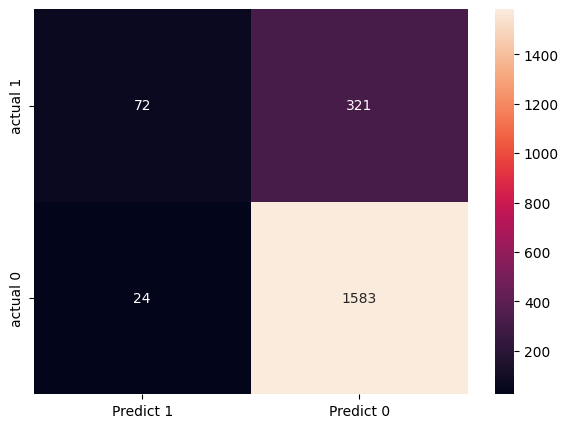

In [72]:
import seaborn as sns
from sklearn.ensemble import BaggingClassifier
model_17=BaggingClassifier(n_estimators=60,max_samples=35)
model_17.fit(x_train,y_train)
y_pred=model_17.predict(x_test)
cm=confusion_matrix(y_test,y_pred,labels=[1,0])
df_cm=pd.DataFrame(cm,index=[i for i in["actual 1","actual 0"]],
                  columns=[i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize=(7,5))
sns.heatmap(df_cm,annot=True,fmt='g')

print("Accuracy Score : ",accuracy_score(y_test,y_pred))
print("Loss : ",log_loss(y_test,y_pred))
print("Classification Report :")
print(classification_report(y_test,y_pred))
print('Accuracy score %s' % accuracy_score(y_test,y_pred))


In [73]:
import pickle
pickle.dump(sc,open('Standard scaler.pkl','wb'))
pickle.dump(rfc,open('model.pkl','wb'))